In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('RTA Dataset (1).csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [3]:
df.shape

(12316, 32)

In [4]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

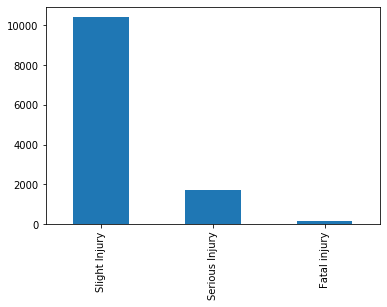

In [5]:
df['Accident_severity'].value_counts().plot.bar()

In [6]:
features_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
for i in features_with_nan:
    print(i,len(i))

Educational_level 17
Vehicle_driver_relation 23
Driving_experience 18
Type_of_vehicle 15
Owner_of_vehicle 16
Service_year_of_vehicle 23
Defect_of_vehicle 17
Area_accident_occured 21
Lanes_or_Medians 16
Road_allignment 15
Types_of_Junction 17
Road_surface_type 17
Type_of_collision 17
Vehicle_movement 16
Work_of_casuality 17
Fitness_of_casuality 20


In [7]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [8]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [9]:
df['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', nan, 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

### Lets deal with individual features

### 1) Sex of driver

In [10]:
df['Sex_of_driver'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [11]:
dic={'Male':0,'Female':1,'Unknown':2}
df['Sex_of_driver']=df['Sex_of_driver'].map(dic)

In [12]:
df['Sex_of_driver'].unique()

array([0, 1, 2], dtype=int64)

### 2) Educational level

In [13]:
df['Educational_level'].unique()   #has 17 missing values

array(['Above high school', 'Junior high school', nan,
       'Elementary school', 'High school', 'Unknown', 'Illiterate',
       'Writing & reading'], dtype=object)

In [14]:
df['Educational_level'].value_counts()

Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: Educational_level, dtype: int64

In [15]:
df['Educational_level'].fillna(df['Educational_level'].mode()[0], inplace=True)

In [16]:
df['Educational_level']

0         Above high school
1        Junior high school
2        Junior high school
3        Junior high school
4        Junior high school
                ...        
12311    Junior high school
12312     Elementary school
12313    Junior high school
12314    Junior high school
12315    Junior high school
Name: Educational_level, Length: 12316, dtype: object

In [17]:
df['Educational_level'].value_counts()

Junior high school    8360
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: Educational_level, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Educational_level= le.fit_transform(df.Educational_level.values)

In [19]:
df['Educational_level'].unique()

array([0, 4, 1, 2, 5, 3, 6])

### 3) Vehicale driver relation

In [20]:
df['Vehicle_driver_relation'].unique()   #579 null values

array(['Employee', 'Unknown', 'Owner', nan, 'Other'], dtype=object)

In [21]:
df['Vehicle_driver_relation']=df['Vehicle_driver_relation'].astype('category')

In [22]:
df['Vehicle_driver_relation'].dtypes

CategoricalDtype(categories=['Employee', 'Other', 'Owner', 'Unknown'], ordered=False)

In [23]:
df['Vehicle_driver_relation'].value_counts()

Employee    9627
Owner       1973
Other        123
Unknown       14
Name: Vehicle_driver_relation, dtype: int64

In [24]:
df['Vehicle_driver_relation'].fillna(df['Vehicle_driver_relation'].mode()[0],inplace=True)

In [25]:
df['Vehicle_driver_relation'].isnull().any()

False

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Vehicle_driver_relation= le.fit_transform(df.Vehicle_driver_relation.values)

In [27]:
df.Vehicle_driver_relation.unique()

array([0, 3, 2, 1])

### 4) Driving experience

In [28]:
df['Driving_experience'].value_counts()   #829 null values

5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: Driving_experience, dtype: int64

In [29]:
df['Driving_experience'].isnull().any()

True

In [30]:
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0],inplace=True)

In [31]:
df['Driving_experience'].isnull().any()

False

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Driving_experience= le.fit_transform(df.Driving_experience.values)

In [33]:
df.Driving_experience=df.Driving_experience.astype('category')

In [34]:
df['Driving_experience'].unique()

[0, 3, 2, 1, 5, 4, 6]
Categories (7, int64): [0, 3, 2, 1, 5, 4, 6]

### 5) Type of vehicle

In [35]:
df['Type_of_vehicle'].value_counts()

Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: Type_of_vehicle, dtype: int64

In [36]:
df['Type_of_vehicle'].isnull().any()

True

In [37]:
df['Type_of_vehicle']=df['Type_of_vehicle'].astype('category')

In [38]:
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0],inplace=True)

In [39]:
df['Type_of_vehicle'].isnull().any()

False

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Type_of_vehicle= le.fit_transform(df.Type_of_vehicle.values)

In [41]:
df.Type_of_vehicle.unique()

array([ 0, 11,  5, 10,  4,  3,  9, 15,  8, 14, 12,  7,  1, 16,  6, 13,  2])

### 6) Owner of vehicle

In [42]:
df['Owner_of_vehicle'].value_counts()

Owner           10459
Governmental     1041
Organization      312
Other              22
Name: Owner_of_vehicle, dtype: int64

In [43]:
df['Owner_of_vehicle'].isnull().any()

True

In [44]:
df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0],inplace=True)

In [45]:
df['Owner_of_vehicle'].isnull().any()

False

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Owner_of_vehicle= le.fit_transform(df.Owner_of_vehicle.values)

In [47]:
df['Owner_of_vehicle'].unique()

array([3, 0, 1, 2])

In [48]:
df['Owner_of_vehicle']=df['Owner_of_vehicle'].astype('category')

### 7) Service year of vehicle

In [49]:
df.drop('Service_year_of_vehicle',axis=1,inplace=True)

In [50]:
df.shape

(12316, 31)

### 8) Defect of vehicle

In [51]:
df['Defect_of_vehicle'].value_counts()

No defect    7777
7              76
5              36
Name: Defect_of_vehicle, dtype: int64

In [52]:
df['Defect_of_vehicle'].isnull().any()

True

In [53]:
df['Defect_of_vehicle'].fillna(df['Defect_of_vehicle'].mode()[0],inplace=True)

In [54]:
df['Defect_of_vehicle'].isnull().any()

False

In [55]:
df['Defect_of_vehicle']=df['Defect_of_vehicle'].astype('category')

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Defect_of_vehicle= le.fit_transform(df.Defect_of_vehicle.values)

In [57]:
df['Defect_of_vehicle'].unique()

array([2, 1, 0])

### 9) Area accident covered

In [58]:
df['Area_accident_occured'].value_counts()

Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: Area_accident_occured, dtype: int64

In [59]:
df['Area_accident_occured'].isnull().any()

True

In [60]:
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0],inplace=True)

In [61]:
df['Area_accident_occured'].isnull().any()

False

In [62]:
df['Area_accident_occured']=df['Area_accident_occured'].astype('category')

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Area_accident_occured= le.fit_transform(df.Area_accident_occured.values)

In [64]:
df['Area_accident_occured'].unique()

array([ 9,  6,  1,  4,  7,  2,  0, 13, 10,  5,  3, 12, 11,  8])

In [65]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Defect_of_vehicle                 0
Area_accident_occured             0
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality        

In [66]:
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0],inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0],inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0],inplace=True)
df['Road_surface_type'].fillna(df['Road_surface_type'].mode()[0],inplace=True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0],inplace=True)
df['Work_of_casuality'].fillna(df['Work_of_casuality'].mode()[0],inplace=True)
df['Fitness_of_casuality'].fillna(df['Fitness_of_casuality'].mode()[0],inplace=True)
df['Fitness_of_casuality'].fillna(df['Fitness_of_casuality'].mode()[0],inplace=True)

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Lanes_or_Medians= le.fit_transform(df.Lanes_or_Medians.values)

In [68]:
df.Road_allignment= le.fit_transform(df.Road_allignment.values)

In [69]:
df.Types_of_Junction= le.fit_transform(df.Types_of_Junction.values)
df.Road_surface_type= le.fit_transform(df.Road_surface_type.values)
df.Type_of_collision= le.fit_transform(df.Type_of_collision.values)
df.Work_of_casuality= le.fit_transform(df.Work_of_casuality.values)
df.Fitness_of_casuality= le.fit_transform(df.Fitness_of_casuality.values)

In [70]:
df.isnull().sum()

Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level                0
Vehicle_driver_relation          0
Driving_experience               0
Type_of_vehicle                  0
Owner_of_vehicle                 0
Defect_of_vehicle                0
Area_accident_occured            0
Lanes_or_Medians                 0
Road_allignment                  0
Types_of_Junction                0
Road_surface_type                0
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision                0
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Work_of_casuality                0
Fitness_of_casuality             0
Pedestrian_movement 

In [71]:
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0],inplace=True)

In [72]:
df.Vehicle_movement= le.fit_transform(df.Vehicle_movement.values)

In [73]:
df.Lanes_or_Medians= le.fit_transform(df.Lanes_or_Medians.values)

In [74]:
from sklearn.preprocessing import LabelEncoder           #or one hot encoder
LE = LabelEncoder()
df=df.apply(LE.fit_transform)

In [75]:
df.shape

(12316, 31)

In [76]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,420,1,0,0,0,0,0,0,3,2,...,2,3,2,5,3,0,2,5,9,2
1,420,1,1,0,4,0,3,11,3,2,...,2,3,2,5,3,0,2,5,16,2
2,420,1,0,0,4,0,0,5,3,2,...,2,0,1,1,2,0,2,5,0,1
3,594,3,0,0,4,0,2,11,0,2,...,2,2,0,0,2,0,2,5,1,2
4,594,3,0,0,4,0,1,0,3,2,...,2,3,2,5,3,0,2,5,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,374,6,1,0,4,0,1,4,3,2,...,2,3,2,5,3,0,2,5,10,2
12312,476,3,4,0,1,0,2,0,3,2,...,4,3,2,5,3,0,2,5,10,2
12313,246,3,2,0,4,0,2,1,3,2,...,4,0,1,1,2,0,2,5,1,1
12314,246,3,0,1,4,0,3,5,3,2,...,4,3,2,5,3,0,2,5,5,2


In [81]:
df.drop(columns = ['Day_of_week','Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality','Time','Sex_of_driver','Educational_level','Owner_of_vehicle','Defect_of_vehicle','Road_surface_type','Casualty_severity'],axis=1,inplace=True)

In [82]:
df.shape

(12316, 20)

In [83]:
df.columns

Index(['Age_band_of_driver', 'Driving_experience', 'Type_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity'],
      dtype='object')

In [84]:
df.drop('Sex_of_casualty',axis=1,inplace=True)

In [85]:
df.shape

(12316, 19)

In [86]:
df.columns

Index(['Age_band_of_driver', 'Driving_experience', 'Type_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [87]:
X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

In [88]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
clf=RandomForestClassifier()

In [92]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
y_pred=clf.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8388798701298701


### Now saving the model and using streamlit to deploy

In [99]:
import joblib
jfile_name="TMLC_severity model.pkl"
joblib.dump(clf,jfile_name)

['TMLC_severity model.pkl']

In [100]:
joblib_model=joblib.load(jfile_name)
joblib_model

RandomForestClassifier()

In [97]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [98]:
df.shape

(12316, 19)